In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# import plotly.express as px
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import seaborn as sns

In [2]:
def load_dataset():
    data = pd.read_csv("/Users/student/Desktop/Kerakli/Project all/Django/My-Mobapp-Studio/data/googleplaystore.csv")
    return data

In [3]:
dataset = load_dataset()
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
def print_summarize_dataset(dataset):

    print(f"View reference : {dataset.head()}\n\n\n"

             f"Data set info : {dataset.info()}\n\n\n"

             f"Data set form : {dataset.shape}\n\n\n"

             f"Describe the data set : {dataset.describe()}\n\n\n"

          f"Data set isnull :{dataset.isnull().sum()}")


In [5]:
print_summarize_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
View reference :                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESI

In [6]:
def clean_dataset(dataset):
    df = dataset[dataset['Android Ver'] != 'NaN']
    df = df[df['Installs'] != 'Free']
    df.Installs = df.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
    df.Installs = df.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
    df.Installs = df.Installs.apply(lambda x: int(x))
    df.Size = df.Size.apply(lambda x: x.replace('M', '000') if 'M' in x else x)
    df.Size = df.Size.apply(lambda x: x.replace('k','') if 'k' in str(x) else x)
    df.Size = df.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in str(x) else x)
    df.Size = df.Size.apply(lambda x: float(x))
    df.Price = df.Price.apply(lambda x: x.replace('$','') if '$' in str(x) else x)
    df.Price = df.Price.astype(float)
    df.Reviews = df.Reviews.apply(lambda x: int(x))
    return df

In [7]:
dataset = clean_dataset(dataset)
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
def print_histograms(dataset):
    # sb.distplot(dataset.Category.value_counts().values)
    # plt.show()
    # fig = {
    #   "data": [
    #     {
    #       "values": dataset.Category.value_counts().values,
    #       "labels": dataset.Category.value_counts().index,
    #       "type": "pie"
    #     }],
    #   "layout": {
    #         "title":"Percentages of Categories in PlayStore"
    #     }
    # }
    # iplot(fig)
    fig = plt.figure(figsize = (8, 8))
    sns.set(style="darkgrid")
    sns.histplot(data = dataset.Category.value_counts().values, kde = True)
    plt.show()


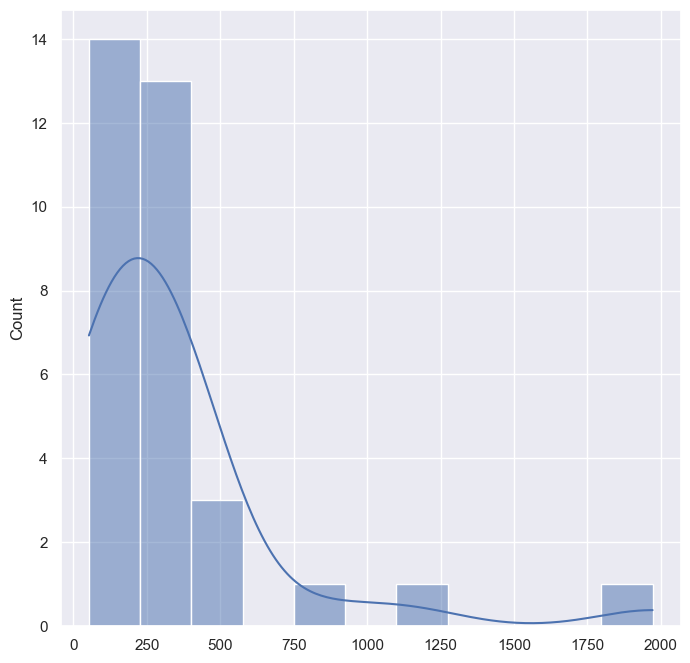

In [9]:
print_histograms(dataset)

In [10]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10,10))
    plt.style.use('classic')
    sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis', linewidth=0.5)
    plt.show()

/var/folders/lq/7btllx4953scrkzwd28d3q040000gp/T/ipykernel_5187/1702270784.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis', linewidth=0.5)


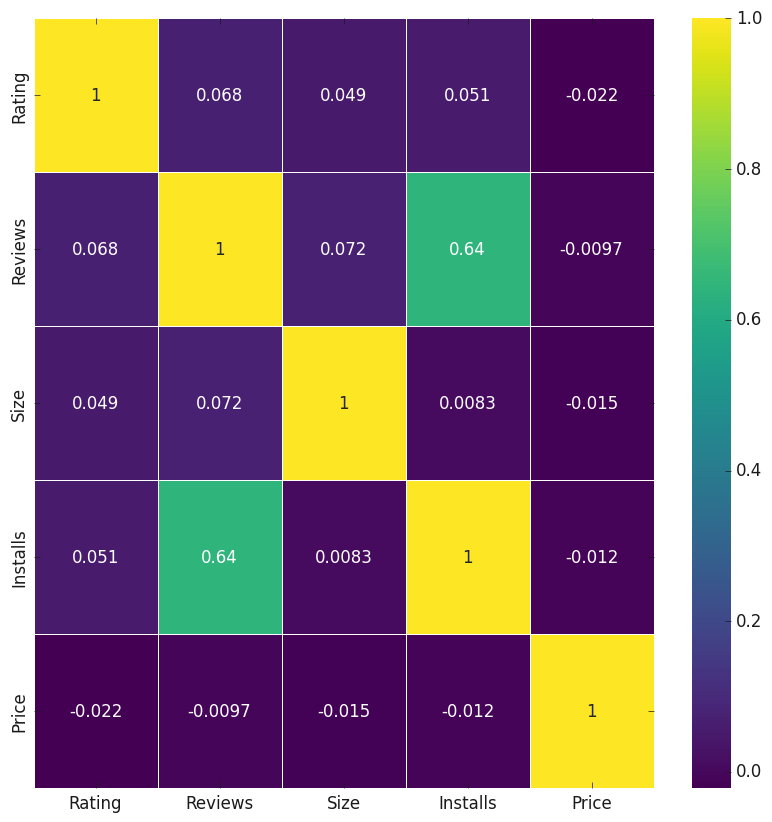

In [11]:
compute_correlations_matrix(dataset)